<a href="https://colab.research.google.com/github/TimoCodez/Python-BIA/blob/main/Intermediary_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directory, Libraries and data

In [1]:
%cd /content/drive/MyDrive/business_analyst/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/business_analyst/Statistics and Descriptive Analytics/Intermediary Statistics


In [2]:
# Libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [3]:
# Load data
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distributions

<Axes: ylabel='Density'>

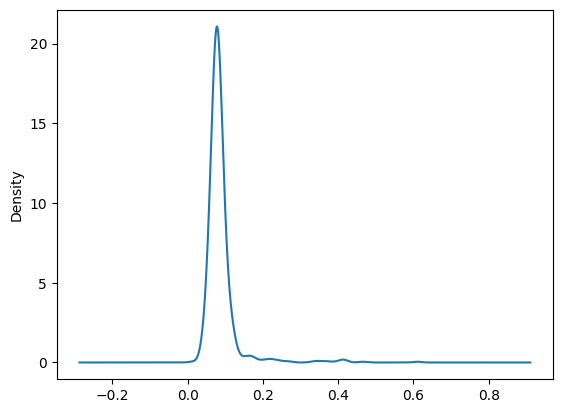

In [4]:
# Density plot of chlorides
df.chlorides.plot.density()

In [5]:
# Check the number of observations withing X standard deviations, 69-95-99 check
df.loc[(df.chlorides <= df.chlorides.mean() +1 * df.chlorides.std()) &
       (df.chlorides >= df.chlorides.mean() -1 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9480925578486554

<Axes: ylabel='Density'>

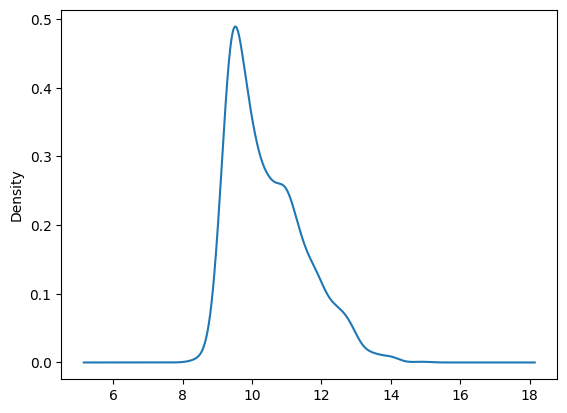

In [6]:
# distribution plot of alcohol
df.alcohol.plot.density()

In [7]:
# plot alcohol distribution and check how many observations within 3 standard deviations
df.loc[(df.alcohol <= df.alcohol.mean() +3 * df.alcohol.std()) &
       (df.alcohol >= df.alcohol.mean() -3 * df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9949968730456535

# Shapiro-Wilks Test

In [8]:
# Shapiro-Wilks for normality
stat, p = st.shapiro(df.chlorides)
print(p)
#condition
if p > 0.05:
  print('Sample looks Gaussian/Normal (Fail to reject H0)')
else:
  print('Sample does not look Gaussian/Normal (reject H0)')

0.0
Sample does not look Gaussian/Normal (reject H0)


In [9]:
# Shapiro-Wilks test for Sulphates and create if else condition
stat, p = st.shapiro(df.sulphates)
print(p)
#condition
if p > 0.05:
  print('Sample looks Gaussian/Normal (Fail to reject H0)')
else:
  print('Sample does not look Gaussian/Normal (reject H0)')

5.821617678881608e-38
Sample does not look Gaussian/Normal (reject H0)


# Standard Error

In [10]:
# using a function with SciPy stats library
st.sem(df.alcohol)

0.026650018979018173

In [11]:
# us doing the computations: Standard deviations divided by square too of observations using Math library
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018173

In [12]:
#Standard error of pH
st.sem(df.pH)

0.0038608683325203784

In [13]:
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203784

# Confidense interval

In [14]:

# Confidense interval of the mean of citric acid
print(df[['citric acid']].mean())
st.norm.interval(confidence = 0.95,
                 loc = df[['citric acid']].mean(),
                 scale = st.sem(df[['citric acid']]))

citric acid    0.270976
dtype: float64


(array([0.26142755]), array([0.28052367]))

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

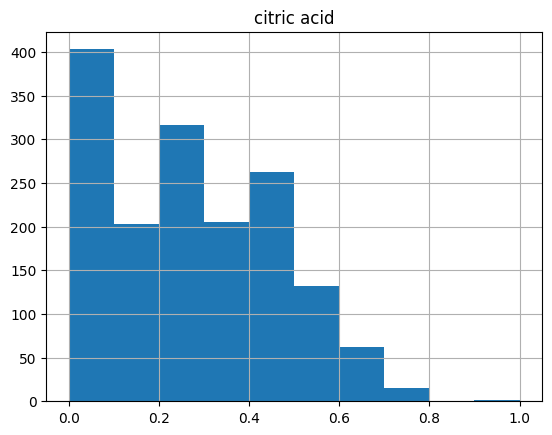

In [15]:
# Histogram
df[['citric acid']].hist()

In [16]:

# Confidense interval of the mean of density
print(df.density.mean())
st.norm.interval(confidence = 0.95,
                 loc = df.density.mean(),
                 scale = st.sem(df.density))


0.9967466791744841


(0.9966541725972521, 0.9968391857517162)

<Axes: >

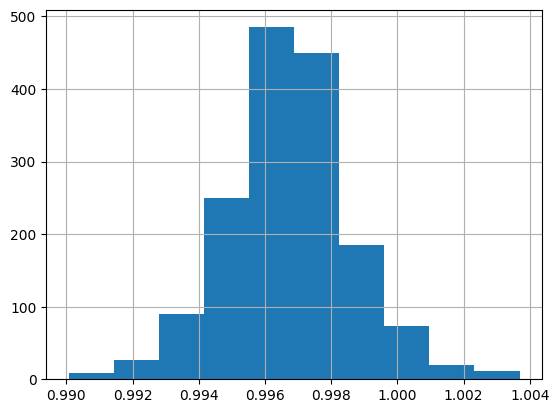

In [17]:
# Histogram
df.density.hist()

# T-Test

In [18]:
%cd /content/drive/MyDrive/business_analyst/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/business_analyst/Statistics and Descriptive Analytics/Intermediary Statistics


In [19]:
# load data
data = pd.read_csv("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# subset data
salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
salary_de = data.loc[data.Country == 'Germany'].Salary

In [21]:
# T-Test
stat, p =st.ttest_ind(a = salary_uk, b = salary_de)
print(p)
if p > 0.05:
  print('Both countries have similar salaries (fail to reject H0)')
else:
  print('There is a difference in salaries (reject H0)')

0.026389999555203502
There is a difference in salaries (reject H0)


In [22]:
# T-test in experience between India and USA (YearsCodedJob)
exp_usa = data.loc[data.Country == 'United States'].YearsCodedJob
exp_india = data.loc[data.Country == 'India'].YearsCodedJob


In [23]:
# T-Test
stat, p =st.ttest_ind(a = exp_usa, b = exp_india)
print(p)
if p > 0.05:
  print('Both countries have similarly experienced coders (fail to reject H0)')
else:
  print('There is a difference in experience of the coders (reject H0)')

5.225676347614714e-58
There is a difference in experience of the coders (reject H0)


<Axes: >

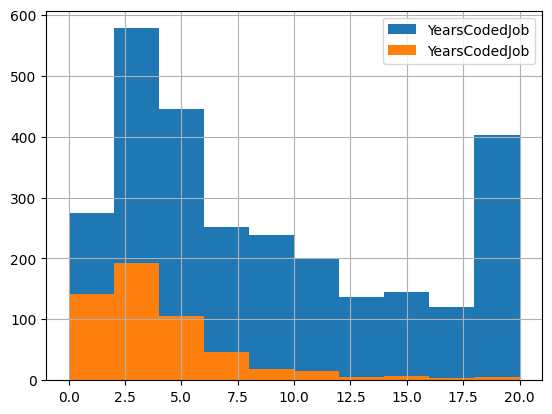

In [24]:
# Histograms
exp_usa.hist(legend= True)
exp_india.hist(legend= True)

# Chi-Square test